In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
ruta = ('https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/datos_facturas.csv?_sm_au_=iVVjpm8RlpHJHq5F26q8vKHV6CTMc')
datos = pd.read_csv(ruta, sep = ';')
df = pd.DataFrame(datos)
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18,118
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27,177
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36,236
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,"22,5","147,5"


In [81]:
if df['total_pagado'].dtype == object:
  df['total_pagado'] = pd.to_numeric(df['total_pagado'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")

In [82]:
mediaTP = df['total_pagado'].mean()
print('Media total pagado:', mediaTP)
medianaTP = df['total_pagado'].median()
print('Mediana total pagado:', medianaTP)
modaTP = df['total_pagado'].mode()[0]
print('Moda total pagado:', modaTP)

Media total pagado: 147.30888888888887
Mediana total pagado: 135.0
Moda total pagado: 118.0


In [83]:
rangoTP = np.ptp(df['total_pagado'])
varianzaTP = df['total_pagado'].var()
desvTP = df['total_pagado'].std()
coeficiente_variacionTP = (desvTP / df['total_pagado'].mean()) * 100
print("Rango:", rangoTP)
print("Varianza:", varianzaTP)
print("Desviación estándar:", desvTP)
print("Coeficiente de variación:", coeficiente_variacionTP)


Rango: 206.5
Varianza: 3356.593555555555
Desviación estándar: 57.93611615871015
Coeficiente de variación: 39.329681050279184


In [84]:
rango_intercuartilico = df['total_pagado'].quantile(0.75) - df['total_pagado'].quantile(0.25)
cuartil_primero = df['total_pagado'].quantile(0.25)
percentil_90 = df['total_pagado'].quantile(0.90)
print("Rango intercuartílico:", rango_intercuartilico)
print("Cuartil primero (percentil 25):", cuartil_primero)
print("Percentil 90:", percentil_90)

Rango intercuartílico: 81.0
Cuartil primero (percentil 25): 108.0
Percentil 90: 236.0


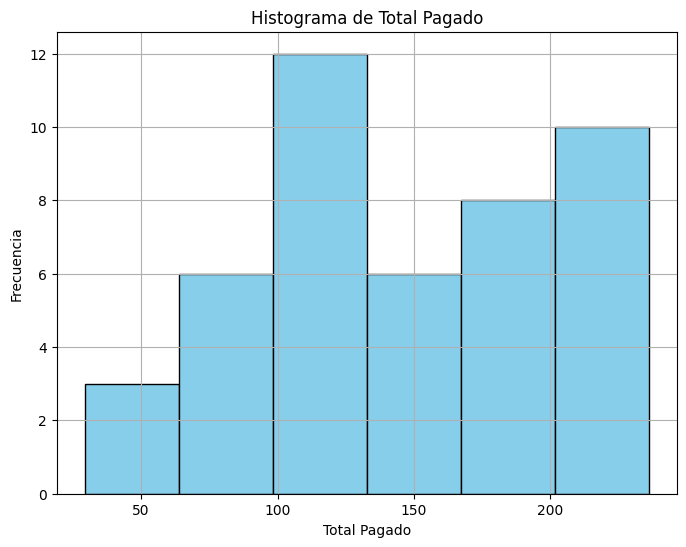

In [85]:
kurtosis = df['total_pagado'].kurtosis()
apuntamiento = 3 - df['total_pagado'].kurtosis()
# Calculando el número óptimo de bins usando la regla de Sturges
n_bins = int(1 + np.log2(len(df['total_pagado'])))
plt.figure(figsize=(8,6))
plt.hist(df['total_pagado'], bins = n_bins, color = 'skyblue', edgecolor='black')
plt.title('Histograma de Total Pagado')
plt.xlabel('Total Pagado')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

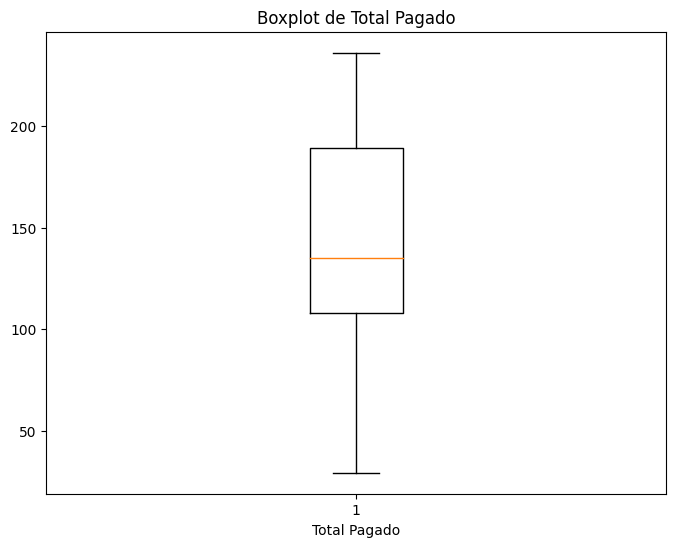

In [86]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['total_pagado'])
plt.title('Boxplot de Total Pagado')
plt.xlabel('Total Pagado')
plt.show()

**Comentarios Parte 1:**
*  La media del total pagado es de aproximadamente 147.31 unidades monetarias. Esto significa que, en promedio, el monto total pagado en todas las facturas es alrededor de 147.31 unidades monetarias.
*   La mediana del total pagado es de 135 unidades monetarias. Esto indica que el valor medio del total pagado está en el centro del conjunto de datos, y la mitad de los valores están por encima y la otra mitad por debajo de este valor.
*   La moda del total pagado es de 118 unidades monetarias. Esto indica que el valor más común o frecuente del total pagado en las facturas es de 118 unidades monetarias.
*   El rango del total pagado es de 206.5 unidades monetarias. Esto representa la diferencia entre el valor máximo y el valor mínimo de los pagos realizados en todas las facturas.
*   La varianza del total pagado es de aproximadamente 3356.59 unidades monetarias al cuadrado. Indica cuánto se dispersan los valores del total pagado alrededor de la media.
*   La desviación estándar del total pagado es de aproximadamente 57.94 unidades monetarias. Es una medida de dispersión que indica cuánto se alejan los valores del total pagado de la media.
*   El coeficiente de variación es del 39.33%. Esto indica la variabilidad relativa de los pagos en relación con la media. Un valor alto sugiere una alta variabilidad en los pagos en relación con la media.
*   El rango intercuartílico es de 81 unidades monetarias. Esto indica la dispersión de los datos dentro del rango intercuartílico, que abarca el 50% central de los datos.
*   El cuartil primero (percentil 25) es de 108 unidades monetarias. Esto significa que el 25% de los pagos son iguales o inferiores a este valor.
*   El percentil 90 es de 236 unidades monetarias. Esto indica que el 90% de los pagos son iguales o inferiores a este valor.











In [87]:
df_filtrado = df.loc[df['factura_pagada']=='si']
cliente_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum().idxmax()
total_mas_pago = df_filtrado.groupby('cliente')['total_pagado'].sum().max()
print('El cliente que ha pagado más en todas las facturas es:', cliente_mas_pago)
print('Total pagado por este cliente:', total_mas_pago)

El cliente que ha pagado más en todas las facturas es: clienteA
Total pagado por este cliente: 1534.0


In [88]:
febrero_df = df.loc[(df['mes']=='Febrero') & (df['factura_pagada']=='si')]
cliente_menos_facturas = febrero_df['cliente'].value_counts().idxmin()
numero_facturas_menos = febrero_df['cliente'].value_counts().min()
print("El cliente que ha pagado menos facturas en febrero es:", cliente_menos_facturas)
print("Número de facturas pagadas por este cliente en febrero:", numero_facturas_menos)

El cliente que ha pagado menos facturas en febrero es: clienteC
Número de facturas pagadas por este cliente en febrero: 1


**Comentarios Parte 2:**


*   Cliente más rentable: El cliente "clienteA" ha pagado el total más alto en todas las facturas. Sería beneficioso para la compañía mantener una relación sólida con este cliente y explorar oportunidades para aumentar la participación de este cliente, ofreciendo descuentos o servicios adicionales.

*   Cliente menos activo en febrero: El cliente "clienteC" ha pagado el menor número de facturas en febrero. Sería importante investigar las razones detrás de esta baja actividad y considerar estrategias para fomentar una mayor participación de este cliente, como ofrecer incentivos especiales o mejorar la calidad del servicio.



In [89]:
if df['IVA'].dtype == object:
  df['IVA'] = pd.to_numeric(df['IVA'].str.replace(',','.'), errors= 'coerce')
else:
  print("La variable ya se ha convertido a numérica")
covarianza = df['IVA'].astype(float).cov(df['total_pagado'])
print("La covarianza entre el IVA y el total pagado es:", covarianza)

La covarianza entre el IVA y el total pagado es: 526.768808080808


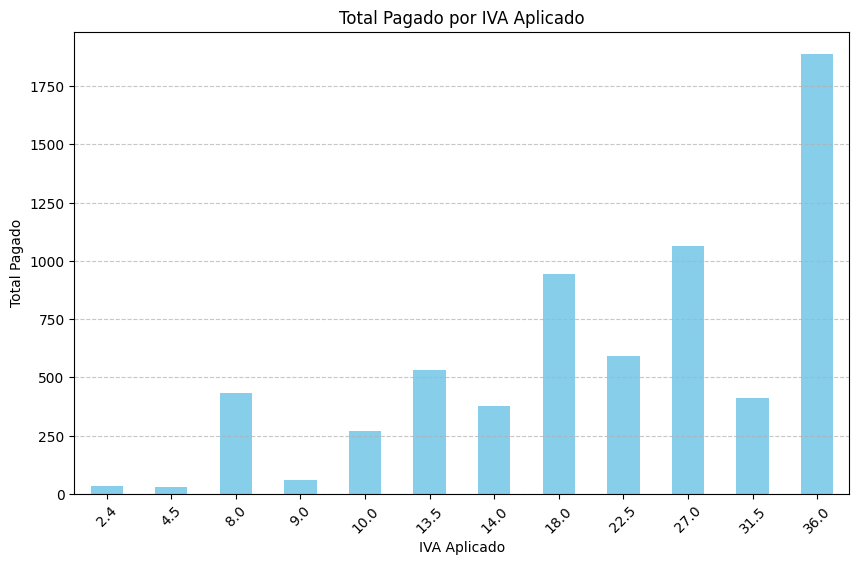

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
total_por_iva = df.groupby('IVA')['total_pagado'].sum()
plt.figure(figsize=(10, 6))
total_por_iva.plot(kind='bar', color='skyblue')
plt.title('Total Pagado por IVA Aplicado')
plt.xlabel('IVA Aplicado')
plt.ylabel('Total Pagado')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Comentarios Parte 3:**
Basarse únicamente en el gráfico de dispersión y la covarianza para construir un modelo predictivo podría no ser suficiente, lógicamente cuando el valor del IVA aumenta, el total pagado tiende a aumentar también, y viceversa. Sin embargo, la magnitud de la covarianza no dice mucho sobre la fuerza de la relación o su significancia estadística, sería necesario utilizar otros métodos estadísticos, por ejemplo, análisis de correlaciones, regresiones, etc.

**Parte 4 Recomendaciones:**

1.   Mantener un enfoque en la retención y satisfacción del cliente, especialmente con clientes de alto valor como "clienteA".
2.   Implementar estrategias para incentivar la participación de clientes menos activos, como programas de fidelización o descuentos personalizados.
3. Monitorear de cerca las tendencias en los pagos y el comportamiento del cliente para identificar oportunidades de mejora y anticipar cambios en la demanda o el mercado.



